In [32]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geoplot
import seaborn as sns

# Data

In [33]:
df_enc = pd.read_csv('data\encounter-events.csv')
df_enc.head()

,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,end_time,mean_latitude,mean_longitude,duration_hr,median_distance_km,median_speed_knots
0,416565000,354240000,2016-11-18T14:30:00Z,2016-11-19T01:50:00Z,-17.039085,-79.063725,11.333333,0.038188,0.585402
1,412679190,354240000,2016-12-11T14:50:00Z,2016-12-11T19:50:00Z,-20.269608,-79.244953,5.000000,0.020033,0.575663
2,440863000,354240000,2017-06-13T12:50:00Z,2017-06-15T01:20:00Z,-62.640767,-60.690240,36.500000,0.054992,0.019775
3,416563000,354240000,2016-11-15T11:30:00Z,2016-11-16T04:00:00Z,-17.046586,-79.061923,16.500000,0.036427,1.023917
4,441309000,354240000,2017-05-19T00:40:00Z,2017-05-19T20:50:00Z,-46.627878,-60.554922,20.166667,0.034053,0.544031


In [34]:
df_loit = pd.read_csv('data\loitering-events.csv')
df_loit.head()

,transshipment_mmsi,starting_latitude,starting_longitude,ending_latitude,ending_longitude,starting_timestamp,ending_timestamp,median_speed_knots,total_event_duration
0,256064000,12.793800,-69.503235,12.727950,-69.739120,2017-09-06T02:11:32Z,2017-09-06T15:44:15Z,1.091065,13.915556
1,256064000,25.405013,-56.302800,25.393350,-56.488250,2017-07-22T13:19:49Z,2017-07-22T23:59:17Z,1.548335,10.897639
2,256064000,10.693413,-78.512800,10.484500,-78.884300,2017-11-29T14:48:51Z,2017-11-30T07:43:36Z,1.503456,18.001389
3,256064000,11.858933,-75.553383,12.007627,-75.535627,2017-09-07T23:39:03Z,2017-09-08T14:59:26Z,0.650355,16.193611
4,256064000,45.938747,-23.796960,45.976960,-23.449387,2017-08-17T23:18:21Z,2017-08-18T17:56:30Z,1.009874,19.748333


In [35]:
df_ves = pd.read_csv('data/transshipment-vessels.csv') #For some reason this exact relative path causes issues when using the "/" character under windows, no issues under linux tho..... 

df_ves.head()

,mmsi,shipname,callsign,flag,imo,first_timestamp,last_timestamp
0,306117000.0,SIERRALAUREL,PJBQ,ANT,9163403.0,2018-03-29T08:34:21Z,2018-06-30T17:08:41Z
1,306873000.0,SIERRALEYRE,PJJZ,ANT,9135822.0,2012-01-01T01:06:00Z,2012-06-26T08:58:28Z
2,309681.0,GREENBRAZIL,C6WH6,BHS,9045792.0,2018-06-29T10:34:00Z,2018-06-30T23:47:40Z
3,308735000.0,NOVA BRETAGNE,C6JI7,BHS,9000364.0,2012-01-01T00:39:08Z,2013-09-12T10:03:48Z
4,311000682.0,SIERRA LARA,C6DI3,BHS,9120205.0,2017-07-03T10:28:05Z,2018-06-30T23:35:36Z


# Maps

## Encounter Events

<AxesSubplot:>

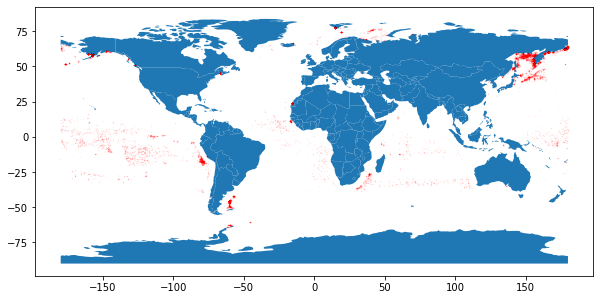

In [36]:
geometry = [Point(xy) for xy in zip(df_enc['mean_longitude'], df_enc['mean_latitude'])]
gdf_enc = GeoDataFrame(df_enc.copy(), geometry=geometry)   #Copy to avoid creating a shallow copy


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf_enc.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=0.1, alpha = 0.1)

C:\Users\janck\anaconda3\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


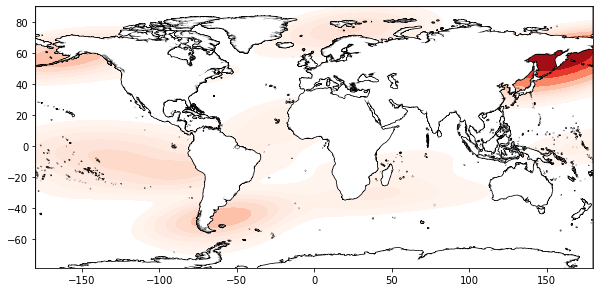

In [37]:
#Notes and Link to docs can be found under loitering

ocean = gpd.read_file("outside_data/ocean/ne_10m_ocean.shp")

ax = ocean.boundary.plot(figsize=(10, 6), edgecolor = "black")



plotdf = geoplot.kdeplot(gdf_enc, ax= ax,  cmap ="Reds", clip = ocean, shade = True , legend = True, thresh = 0.1)#Todo adapt clip = world to plot outside the continental area, thresh = 0.1, edgecolor = "black"

plotdf.set_axis_on()



## Loitering Events

<AxesSubplot:>

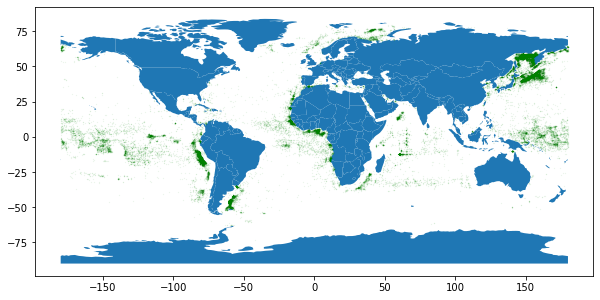

In [68]:
geometry = [Point(xy) for xy in zip(df_loit['starting_longitude'], df_loit['starting_latitude'])]
gdf_loit = GeoDataFrame(df_loit.copy(), geometry=geometry)   #Copy to avoid creating a shallow copy


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf_loit.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='green', markersize=0.1, alpha = 0.1)

C:\Users\janck\anaconda3\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


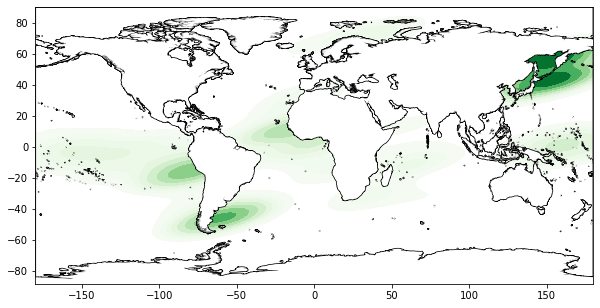

In [39]:

#Geoplot Documentation: https://residentmario.github.io/geoplot/plot_references/plot_reference.html
#We're free to color the oceans as well as indiviual countries depending on the geometries we select
#Note that I set thresh to 0.2! thereby ignoring 10% of the data

ocean = gpd.read_file("outside_data/ocean/ne_10m_ocean.shp")

ax = ocean.boundary.plot(figsize=(10, 6), edgecolor = "black")



plotdf = geoplot.kdeplot(gdf_loit, ax= ax,  cmap ="Greens", clip = ocean, shade = True , legend = True,thresh = 0.1)#Todo adapt clip = world to plot outside the continental area, thresh = 0.1, edgecolor = "black"

plotdf.set_axis_on()


C:\Users\janck\anaconda3\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

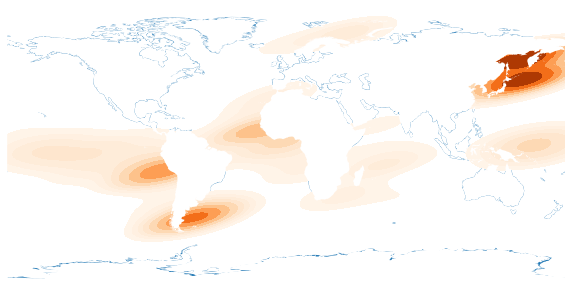

In [40]:
#a far simpler solution

ax = world.plot(figsize=(10, 6))

geoplot.kdeplot(gdf_loit, ax= ax,  cmap ="Oranges", thresh = 0.1, clip = ocean, shade = True )


# Data Quality 

## Duplicates:

In [41]:
print("Encounter Events: " +str(df_enc.duplicated().sum()))
print("Loitering Events: " +str(df_loit.duplicated().sum()))
print("Vessels: " +str(df_ves.duplicated().sum()))

Encounter Events: 98
Loitering Events: 184
Vessels: 0


We have multiple duplicates in both datasets, the ships' registry is not affected

## Data Types, Null Values and NAs

In [42]:
df_enc.info()
print('NAs:')
print(df_enc.isna().sum(axis = 0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fishing_vessel_mmsi        11681 non-null  int64  
 1   transshipment_vessel_mmsi  11681 non-null  int64  
 2   start_time                 11681 non-null  object 
 3   end_time                   11681 non-null  object 
 4   mean_latitude              11681 non-null  float64
 5   mean_longitude             11681 non-null  float64
 6   duration_hr                11681 non-null  float64
 7   median_distance_km         11681 non-null  float64
 8   median_speed_knots         11681 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 821.4+ KB
NAs:
fishing_vessel_mmsi          0
transshipment_vessel_mmsi    0
start_time                   0
end_time                     0
mean_latitude                0
mean_longitude               0
duration_hr          

In [43]:
print('Null values:')
print(df_enc.isnull().sum(axis = 0))

Null values:
fishing_vessel_mmsi          0
transshipment_vessel_mmsi    0
start_time                   0
end_time                     0
mean_latitude                0
mean_longitude               0
duration_hr                  0
median_distance_km           0
median_speed_knots           0
dtype: int64


In [44]:
df_loit.info()
print('NAs:')
print(df_loit.isna().sum(axis = 0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46569 entries, 0 to 46568
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transshipment_mmsi    46569 non-null  int64  
 1   starting_latitude     46569 non-null  float64
 2   starting_longitude    46569 non-null  float64
 3   ending_latitude       46569 non-null  float64
 4   ending_longitude      46569 non-null  float64
 5   starting_timestamp    46569 non-null  object 
 6   ending_timestamp      46569 non-null  object 
 7   median_speed_knots    46569 non-null  float64
 8   total_event_duration  46569 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.2+ MB
NAs:
transshipment_mmsi      0
starting_latitude       0
starting_longitude      0
ending_latitude         0
ending_longitude        0
starting_timestamp      0
ending_timestamp        0
median_speed_knots      0
total_event_duration    0
dtype: int64


In [45]:
print('Null values:')
print(df_loit.isnull().sum(axis = 0))

Null values:
transshipment_mmsi      0
starting_latitude       0
starting_longitude      0
ending_latitude         0
ending_longitude        0
starting_timestamp      0
ending_timestamp        0
median_speed_knots      0
total_event_duration    0
dtype: int64


Of note is that while the two datasets feature the same number of dimensions, the features are inherently different:
The second dataset especially features starting and ending timestamps and locations instead of means and needs to be adapted for direct comparission

Also the time objects need to be transformed into timestamp objects for further analysis

In [46]:
df_ves.info()
print('NAs:')
print(df_ves.isna().sum(axis = 0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mmsi             1070 non-null   float64
 1   shipname         1123 non-null   object 
 2   callsign         1106 non-null   object 
 3   flag             1124 non-null   object 
 4   imo              1074 non-null   float64
 5   first_timestamp  1070 non-null   object 
 6   last_timestamp   1070 non-null   object 
dtypes: float64(2), object(5)
memory usage: 61.6+ KB
NAs:
mmsi               54
shipname            1
callsign           18
flag                0
imo                50
first_timestamp    54
last_timestamp     54
dtype: int64


And here we encounter our first real issues: NA values in all features that need to be further investigated
However, if we are lucky, these issues do not affect ships in the two main datasets, especially because these must feature a mmsi value 

In [47]:
print('Null values:')
print(df_ves.isnull().sum(axis = 0))

Null values:
mmsi               54
shipname            1
callsign           18
flag                0
imo                50
first_timestamp    54
last_timestamp     54
dtype: int64


# Data Transformation

In [48]:
df_enc_mod = df_enc.copy()

df_enc_mod.drop_duplicates(inplace = True) #remove duplicates

df_enc_mod['start_time'] = pd.to_datetime(df_enc['start_time'])#parse time objects 
df_enc_mod['end_time'] = pd.to_datetime(df_enc['end_time'])
df_enc_mod['encounter'] = 1 #Creating target variable
df_enc_mod.info()
df_enc_mod.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11583 entries, 0 to 11680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   fishing_vessel_mmsi        11583 non-null  int64              
 1   transshipment_vessel_mmsi  11583 non-null  int64              
 2   start_time                 11583 non-null  datetime64[ns, UTC]
 3   end_time                   11583 non-null  datetime64[ns, UTC]
 4   mean_latitude              11583 non-null  float64            
 5   mean_longitude             11583 non-null  float64            
 6   duration_hr                11583 non-null  float64            
 7   median_distance_km         11583 non-null  float64            
 8   median_speed_knots         11583 non-null  float64            
 9   encounter                  11583 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(5), int64(3)
memory usage: 995.4 KB

,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,end_time,mean_latitude,mean_longitude,duration_hr,median_distance_km,median_speed_knots,encounter
0,416565000,354240000,2016-11-18 14:30:00+00:00,2016-11-19 01:50:00+00:00,-17.039085,-79.063725,11.333333,0.038188,0.585402,1
1,412679190,354240000,2016-12-11 14:50:00+00:00,2016-12-11 19:50:00+00:00,-20.269608,-79.244953,5.000000,0.020033,0.575663,1
2,440863000,354240000,2017-06-13 12:50:00+00:00,2017-06-15 01:20:00+00:00,-62.640767,-60.690240,36.500000,0.054992,0.019775,1
3,416563000,354240000,2016-11-15 11:30:00+00:00,2016-11-16 04:00:00+00:00,-17.046586,-79.061923,16.500000,0.036427,1.023917,1
4,441309000,354240000,2017-05-19 00:40:00+00:00,2017-05-19 20:50:00+00:00,-46.627878,-60.554922,20.166667,0.034053,0.544031,1


In [49]:
df_loit_mod =  df_loit.copy()
df_loit_mod.drop_duplicates(inplace = True) #dropping duplicates


df_loit_mod['start_time'] = pd.to_datetime(df_loit['starting_timestamp']) #parsing timestamps

df_loit_mod['end_time'] = pd.to_datetime(df_loit['ending_timestamp'])

df_loit_mod.drop(['starting_timestamp', 'ending_timestamp'], axis=1, inplace=True)


df_loit_mod['mean_latitude'] = (df_loit_mod['starting_latitude']+df_loit_mod['ending_latitude'])/2 #transforming locations to mean
df_loit_mod['mean_longitude'] = (df_loit_mod['starting_longitude']+df_loit_mod['ending_longitude'])/2

df_loit_mod.rename(columns ={'transshipment_mmsi':'transshipment_vessel_mmsi', 'total_event_duration':'duration_hr'}, inplace = True)

df_loit_mod['encounter'] = 0 #creating target variable

df_loit_mod.info()
df_loit_mod.describe()
df_loit_mod.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46385 entries, 0 to 46568
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   transshipment_vessel_mmsi  46385 non-null  int64              
 1   starting_latitude          46385 non-null  float64            
 2   starting_longitude         46385 non-null  float64            
 3   ending_latitude            46385 non-null  float64            
 4   ending_longitude           46385 non-null  float64            
 5   median_speed_knots         46385 non-null  float64            
 6   duration_hr                46385 non-null  float64            
 7   start_time                 46385 non-null  datetime64[ns, UTC]
 8   end_time                   46385 non-null  datetime64[ns, UTC]
 9   mean_latitude              46385 non-null  float64            
 10  mean_longitude             46385 non-null  float64            
 11  en

Index(['transshipment_vessel_mmsi', 'starting_latitude', 'starting_longitude',
       'ending_latitude', 'ending_longitude', 'median_speed_knots',
       'duration_hr', 'start_time', 'end_time', 'mean_latitude',
       'mean_longitude', 'encounter'],
      dtype='object')

In [72]:
df_ves_mod = df_ves.dropna(subset=['mmsi']) #this is necessary to avoid weird (non sql) behavior from merge (nulls are recognized as keys!)


df_ves_mod['first_timestamp'] = pd.to_datetime(df_ves_mod['first_timestamp']) #parsing timestamps

df_ves_mod['last_timestamp'] = pd.to_datetime(df_ves_mod['last_timestamp'])


df_ves_mod.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 0 to 1069
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   mmsi             1070 non-null   float64            
 1   shipname         1069 non-null   object             
 2   callsign         1055 non-null   object             
 3   flag             1070 non-null   object             
 4   imo              1020 non-null   float64            
 5   first_timestamp  1070 non-null   datetime64[ns, UTC]
 6   last_timestamp   1070 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(2), object(3)
memory usage: 66.9+ KB


C:\Users\janck\AppData\Local\Temp\ipykernel_13396\3216556241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ves_mod['first_timestamp'] = pd.to_datetime(df_ves_mod['first_timestamp']) #parsing timestamps
C:\Users\janck\AppData\Local\Temp\ipykernel_13396\3216556241.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ves_mod['last_timestamp'] = pd.to_datetime(df_ves_mod['last_timestamp'])


In [61]:
df_ves_mod.duplicated(subset = ['mmsi']).sum(axis =  0)

31

This is highly problematic! Because we would like to use mmsi as a primary key for joins!

A fuzzy logic approach is a possible solution

Todo: further investigation

## Aggregating encounter and loitering data

In [51]:
df_agg = pd.concat([df_enc_mod,df_loit_mod], ignore_index=True)
#dropping redundant data:
df_clean = df_agg.copy().drop(['starting_latitude','starting_longitude', 'ending_latitude','ending_longitude'], axis= 1 ) 
#setting target as first column:
col_en =df_clean.pop('encounter')
df_clean.insert(0, col_en.name,col_en)
df_clean.head()
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57968 entries, 0 to 57967
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   encounter                  57968 non-null  int64              
 1   fishing_vessel_mmsi        11583 non-null  float64            
 2   transshipment_vessel_mmsi  57968 non-null  int64              
 3   start_time                 57968 non-null  datetime64[ns, UTC]
 4   end_time                   57968 non-null  datetime64[ns, UTC]
 5   mean_latitude              57968 non-null  float64            
 6   mean_longitude             57968 non-null  float64            
 7   duration_hr                57968 non-null  float64            
 8   median_distance_km         11583 non-null  float64            
 9   median_speed_knots         57968 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(6), int64(2)
memory usage: 4.4 MB


## Merging vessel and encounter/loitering data

In [74]:
####ToDo:
#Some issues with data frame size after each merge: investigate!

print(df_ves.columns)
print(df_clean.info())
df_clean_all = pd.merge(df_clean, df_ves_mod, how ='left', left_on ='transshipment_vessel_mmsi', right_on='mmsi')
print(df_clean_all.info())
df_clean_all.rename(columns= { 'mmsi' : 'mmsi_t', 'shipname': 'shipname_t', 'callsign':'callsign_t', 'flag':'flag_t', 'imo': 'imo_t',\
     'first_timestamp': 'first_timestamp_t', 'last_timestamp':'last_timestamp_t'}, inplace = True)


df_clean_all = pd.merge(df_clean_all, df_ves_mod, how ='left', left_on ='fishing_vessel_mmsi', right_on='mmsi')
df_clean_all.rename(columns= { 'mmsi' : 'mmsi_f', 'shipname': 'shipname_f', 'callsign':'callsign_f', 'flag':'flag_f', 'imo': 'imo_f',\
     'first_timestamp': 'first_timestamp_f', 'last_timestamp':'last_timestamp_f'}, inplace = True)

df_clean_all.info()
df_clean_all.shape

Index(['mmsi', 'shipname', 'callsign', 'flag', 'imo', 'first_timestamp',
       'last_timestamp'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57968 entries, 0 to 57967
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   encounter                  57968 non-null  int64              
 1   fishing_vessel_mmsi        11583 non-null  float64            
 2   transshipment_vessel_mmsi  57968 non-null  int64              
 3   start_time                 57968 non-null  datetime64[ns, UTC]
 4   end_time                   57968 non-null  datetime64[ns, UTC]
 5   mean_latitude              57968 non-null  float64            
 6   mean_longitude             57968 non-null  float64            
 7   duration_hr                57968 non-null  float64            
 8   median_distance_km         11583 non-null  float64            
 9   median_speed_knot

(59409, 24)

## Adding Dummy Variables

In [75]:

df_dummies_all = pd.get_dummies(df_clean_all.copy())

df_dummies_all.info()

df_clean_all.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59409 entries, 0 to 59408
Columns: 1477 entries, encounter to flag_f_USA
dtypes: datetime64[ns, UTC](6), float64(10), int64(2), uint8(1459)
memory usage: 91.3 MB


,encounter,fishing_vessel_mmsi,transshipment_vessel_mmsi,start_time,end_time,mean_latitude,mean_longitude,duration_hr,median_distance_km,median_speed_knots,...,imo_t,first_timestamp_t,last_timestamp_t,mmsi_f,shipname_f,callsign_f,flag_f,imo_f,first_timestamp_f,last_timestamp_f
0,1,416565000.0,354240000,2016-11-18 14:30:00+00:00,2016-11-19 01:50:00+00:00,-17.039085,-79.063725,11.333333,0.038188,0.585402,...,9017276.0,2015-01-31 23:43:15+00:00,2017-03-10 01:21:55+00:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,1,412679190.0,354240000,2016-12-11 14:50:00+00:00,2016-12-11 19:50:00+00:00,-20.269608,-79.244953,5.000000,0.020033,0.575663,...,9017276.0,2015-01-31 23:43:15+00:00,2017-03-10 01:21:55+00:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,1,440863000.0,354240000,2017-06-13 12:50:00+00:00,2017-06-15 01:20:00+00:00,-62.640767,-60.690240,36.500000,0.054992,0.019775,...,9017276.0,2015-01-31 23:43:15+00:00,2017-03-10 01:21:55+00:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,1,416563000.0,354240000,2016-11-15 11:30:00+00:00,2016-11-16 04:00:00+00:00,-17.046586,-79.061923,16.500000,0.036427,1.023917,...,9017276.0,2015-01-31 23:43:15+00:00,2017-03-10 01:21:55+00:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,1,441309000.0,354240000,2017-05-19 00:40:00+00:00,2017-05-19 20:50:00+00:00,-46.627878,-60.554922,20.166667,0.034053,0.544031,...,9017276.0,2015-01-31 23:43:15+00:00,2017-03-10 01:21:55+00:00,NaN,NaN,NaN,NaN,NaN,NaT,NaT


## Standardizing Dataset

In [76]:
from sklearn.preprocessing import StandardScaler 

####Work in Progress, this is will not run
# pandas datetime elements can't be processed by default, theses need to be changed to value f.i.: df['time'] = df['time'].apply(lambda x: x.value), 


x = StandardScaler().fit_transform(df_dummies_all.drop(['encounter'],axis=1)) #dropping attrition because it is the variable under investigation

df_stand = pd.DataFrame(x,columns = df_dummies_all.drop(['encounter'],axis=1).columns)

from sklearn.decomposition import PCA #Tutorial can be found here: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
pca_at = PCA(n_components=2)
principalComponents_at = pca_at.fit_transform(df_stand)

df_pca = pd.DataFrame(data = principalComponents_at
             , columns = ['principal component 1', 'principal component 2'])
print('Explained variation per principal component: {}'.format(pca_at.explained_variance_ratio_))



TypeError: float() argument must be a string or a number, not 'Timestamp'

## Calculating Distance

In [53]:
geometry = [Point(xy) for xy in zip(df_clean_all['mean_longitude'], df_clean_all['mean_latitude'])]
gdf_clean_all = GeoDataFrame(df_clean_all.copy(), geometry=geometry)  


In [54]:
#WIP!!!

#Further Details can be found under proof of concept

#####epsg:4326 is the projection used by the gps and therefore the best crs to apply to our data
#https://epsg.io/4326
gdf_clean_all = gdf_clean_all.set_crs('epsg:4326')

#because we want to calculate our distances in meters we need to project our geometries to metric crs
##https://epsg.io/3395 
gdf_clean_all_temp = gdf_clean_all.to_crs(epsg=3395)

#Creating 3395 land mass
#drop antarctica:

world_merc = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

#Project to mercator

world_merc = world_merc.to_crs("EPSG:3395")

#attempt to simplify, by buffering borders and therefore also coastlines by 1000 m
#This is necesarry to create valid geometries for GeoDataFrame.unary_union to handle

gdf_clean_all['distance_coast'] = gdf_clean_all_temp.distance(world_merc.buffer(1000).unary_union) ###/1000 to change scale to km


run
run, run
run, run, baby run


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 59409 entries, 0 to 59408
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   encounter                  59409 non-null  int64              
 1   fishing_vessel_mmsi        11741 non-null  float64            
 2   transshipment_vessel_mmsi  59409 non-null  int64              
 3   start_time                 59409 non-null  datetime64[ns, UTC]
 4   end_time                   59409 non-null  datetime64[ns, UTC]
 5   mean_latitude              59409 non-null  float64            
 6   mean_longitude             59409 non-null  float64            
 7   duration_hr                59409 non-null  float64            
 8   median_distance_km         11741 non-null  float64            
 9   median_speed_knots         59409 non-null  float64            
 10  mmsi_t                     52943 non-null  float64            

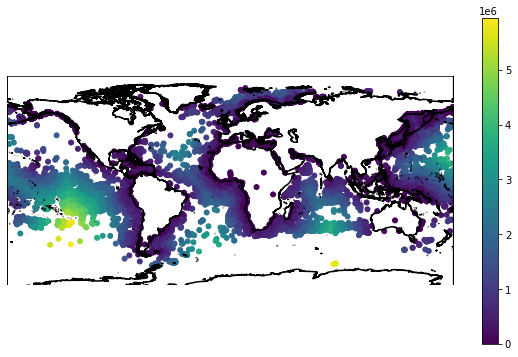

In [59]:
#ToDo: analyze output of distance_coast, especially why there are observations in africa and australia!



ax = ocean.boundary.plot(figsize=(10, 6), edgecolor = "black")

geoplot.pointplot(gdf_clean_all, ax = ax, hue = 'distance_coast', legend = True)

gdf_clean_all.isnull().sum(axis=0)
gdf_clean_all.describe()
gdf_clean_all.info()

In [56]:
gdf_clean_all.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter,59409.0,1.976300e-01,3.982148e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
fishing_vessel_mmsi,11741.0,3.495442e+08,8.564773e+07,2.000080e+06,2.738125e+08,3.383160e+08,4.160041e+08,9.990001e+08
transshipment_vessel_mmsi,59409.0,3.917589e+08,1.206327e+08,2.000011e+08,2.738140e+08,3.568780e+08,4.406640e+08,8.006687e+08
mean_latitude,59409.0,1.573189e+01,3.677945e+01,-6.441952e+01,-1.249830e+01,1.093792e+01,5.254793e+01,8.029572e+01
mean_longitude,59409.0,3.556533e+01,1.133954e+02,-1.799881e+02,-6.059537e+01,3.392950e+01,1.512930e+02,1.799939e+02
duration_hr,59409.0,2.909471e+01,4.341403e+01,2.000000e+00,1.100264e+01,1.782986e+01,3.191361e+01,2.437877e+03
median_distance_km,11741.0,5.900517e-02,6.843897e-02,0.000000e+00,2.915917e-02,4.028944e-02,5.585239e-02,4.980078e-01
median_speed_knots,59409.0,9.290563e-01,4.771086e-01,0.000000e+00,6.451308e-01,9.666133e-01,1.267809e+00,1.999870e+00
mmsi_t,52943.0,3.995984e+08,1.223765e+08,2.000011e+08,2.738209e+08,3.577350e+08,5.151830e+08,8.006687e+08
imo_t,52387.0,8.653753e+06,5.396433e+05,5.007510e+06,8.317356e+06,8.800236e+06,9.044358e+06,9.815305e+06


### Proof of Concept

count    11681.000000
mean         5.684060
std          9.103065
min          0.000000
25%          0.156536
50%          1.693072
75%          6.010244
max         51.652172
dtype: float64
0       3.878302
1       6.410604
2       8.859955
3       3.881512
4       4.655314
         ...    
495    29.997459
496    27.942881
497    20.101761
498    23.482297
499    23.330169
Length: 500, dtype: float64


0      4.362180e+05
1      7.319674e+05
2      1.694794e+06
3      4.366084e+05
4      5.737476e+05
           ...     
495    3.357894e+06
496    3.131221e+06
497    2.245968e+06
498    2.633661e+06
499    2.604802e+06
Length: 500, dtype: float64

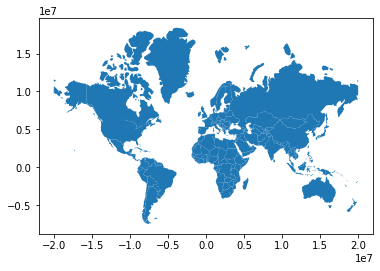

In [57]:
#This is an absolute proof of concept
#Todo Validate and merge with existing Data


#####This is in degrees!!! ToDo: project to a meter based crs and recalculate the distances
####EPSG 32663 (WGS 84 / World Equidistant Cylindrical) , possibly?
#https://epsg.io/3857 is used by google maps, osm etc
#maybe https://geopy.readthedocs.io/en/stable/#module-geopy.distance for distance between to known points!
# 
# gpd.GeoDataFrame.distance can calculate the distance between each elements and also another geometry!
# between two gdfs this is done in a paired linewise way 


#drop antartica
world_no_sarc = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]


print(gdf_enc.distance(world_no_sarc.unary_union).describe())
print(gdf_enc.distance(world_no_sarc.unary_union).head(500))


#####Setting explicit long/lat crs


#####epsg:4326 is the projection used by the gps and therefore the best crs to apply to our data
#https://epsg.io/4326
s = gdf_enc.set_crs('epsg:4326')

#because we want to calculate our distances in meters we need to project our geometries to a metric crs
##https://epsg.io/3395 
t = s.to_crs(epsg=3395)

#Creating 3395 land mass
#drop antarctica:

world_merc = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

#Project to mercator

world_merc = world_merc.to_crs("EPSG:3395")

#attempt to simplify, by buffering borders and therefore also coastlines by 1000 m
#This is necesarry to create valid geometries for GeoDataFrame.unary_union to handle

world_merc.plot()

world_merc.buffer(1000).unary_union

t.distance(world_merc.buffer(1000).unary_union).head(500)


### Validation

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   fishing_vessel_mmsi        11681 non-null  int64   
 1   transshipment_vessel_mmsi  11681 non-null  int64   
 2   start_time                 11681 non-null  object  
 3   end_time                   11681 non-null  object  
 4   mean_latitude              11681 non-null  float64 
 5   mean_longitude             11681 non-null  float64 
 6   duration_hr                11681 non-null  float64 
 7   median_distance_km         11681 non-null  float64 
 8   median_speed_knots         11681 non-null  float64 
 9   geometry                   11681 non-null  geometry
 10  distance                   11681 non-null  float64 
dtypes: float64(6), geometry(1), int64(2), object(2)
memory usage: 1004.0+ KB


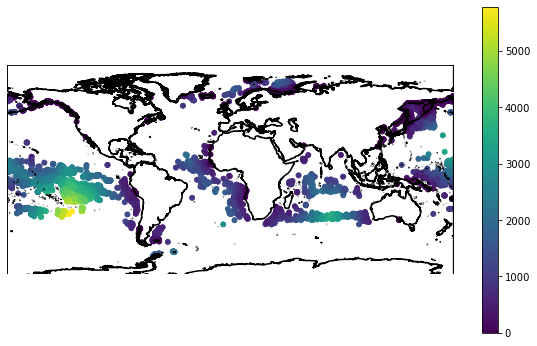

In [58]:

gdf_enc_test = gdf_enc.copy()

gdf_enc_test['distance'] = t.distance(world_merc.buffer(1000).unary_union)/1000 #change scale to km

gdf_enc_test.head()


ax = ocean.boundary.plot(figsize=(10, 6), edgecolor = "black")

geoplot.pointplot(gdf_enc_test, ax= ax, hue='distance', legend=True)#####Looking good!

gdf_enc_test.isnull().sum(axis=0)
gdf_enc_test.describe()
gdf_enc_test.info()